# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
#training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

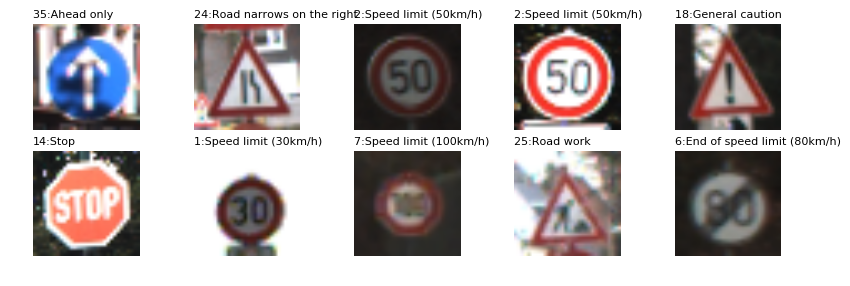

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import csv

# Visualizations will be shown in the notebook.
%matplotlib inline

signFile = csv.DictReader(open('signnames.csv', 'r'))
signDict = {}
for line in signFile:
    signDict[int(line['ClassId'])]=line['SignName']

#show 20 random examples with annotated titles

plt.figure(figsize=(10,3))

for i in range(10):
    index = random.randint(0, len(X_train))
    #plt.figure(i)
    plt.subplot(2,5,i+1)
    image = X_train[index].squeeze()
    plt.axis('off')
    plt.title(str(y_train[index]) + ":" + signDict[y_train[index]], loc='left', fontsize = 8)
    plt.imshow(image)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
### PREPROCESS DATA
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split 

#Randomize order
X_train, y_train = shuffle(X_train, y_train)
#split training data into training data + validation data
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=2)


# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_validation)

# Number of testing examples.
n_test = len(X_test)

# How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Number of classes =", n_classes)

### Making sure data is float so that we can subtract&divide easily
X_train = X_train.astype('float32') 
X_validation = X_validation.astype('float32') 
X_test = X_test.astype('float32') 


### Normalize each pixel value so that it is between (-1, 1)
X_train = (X_train-128)/128
X_validation = (X_validation-128)/128
X_test = (X_test-128)/128


Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630
Number of classes = 43


In [5]:
## 
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def nn(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer 1: Activation.
    conv1 = tf.nn.relu(conv1)

    # Layer 1: Pooling. Input = 30x30x32. Output = 15x15x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    
    # Layer 2: Convolutional. Output = 12x12x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(4, 4, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Layer 2: Activation.
    conv2 = tf.nn.relu(conv2)

    # Layer 2: Pooling. Input = 12x12x64. Output = 6x6x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Convolutional. Output = 4x4x128.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(128))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b

    # Layer 3: Activation.
    conv3 = tf.nn.relu(conv3)

    # Layer 3: Pooling. Input = 4x4x128. Output = 2x2x128.
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 3: Flatten. Input = 2x2x128. Output = 512.
    fc0   = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 512. Output = 128.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(128))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # Layer 4: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Layer 4: Dropout
    fc1    = tf.nn.dropout(fc1, keep_prob) 
    
    # Layer 5: Fully Connected. Input = 128. Output = 64.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(128, 64), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(64))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # Layer 5: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Layer 5: Dropout
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # Layer 6: Fully Connected. Input = 64. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(64, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    # Layer 6: Dropout
    logits = tf.nn.dropout(logits, keep_prob)
    return logits

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32) 


### TRAINING PIPELINE
rate = 0.001

logits = nn(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



In [6]:
### EVALUATION
EPOCHS = 20
BATCH_SIZE = 128

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [7]:
### TRAINING
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.6})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './savedmodel')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.466

EPOCH 2 ...
Validation Accuracy = 0.740

EPOCH 3 ...
Validation Accuracy = 0.880

EPOCH 4 ...
Validation Accuracy = 0.929

EPOCH 5 ...
Validation Accuracy = 0.950

EPOCH 6 ...
Validation Accuracy = 0.970

EPOCH 7 ...
Validation Accuracy = 0.980

EPOCH 8 ...
Validation Accuracy = 0.986

EPOCH 9 ...
Validation Accuracy = 0.986

EPOCH 10 ...
Validation Accuracy = 0.986

EPOCH 11 ...
Validation Accuracy = 0.992

EPOCH 12 ...
Validation Accuracy = 0.992

EPOCH 13 ...
Validation Accuracy = 0.993

EPOCH 14 ...
Validation Accuracy = 0.995

EPOCH 15 ...
Validation Accuracy = 0.994

EPOCH 16 ...
Validation Accuracy = 0.996

EPOCH 17 ...
Validation Accuracy = 0.996

EPOCH 18 ...
Validation Accuracy = 0.995

EPOCH 19 ...
Validation Accuracy = 0.995

EPOCH 20 ...
Validation Accuracy = 0.995

Model saved


In [8]:
### Evaluate model with test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.967


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

1.) The data was shuffled to make the data independent of the order.

2.) The data was then normalized so that the mean is centered on 0, so that the optimizer can easily find the local minima.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**


The test data was split with 20% going to validation. The number of examples for each category is listed below:

Number of training examples = 31367

Number of validation examples = 7842

Number of testing examples = 12630


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


The architecture is based on a modified LeNet architecture with an additional convolution layer:
- Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x32.
- Layer 1: Activation - ReLU
- Layer 1: Pooling. Input = 30x30x32. Output = 15x15x32.
- Layer 2: Convolutional. Output = 12x12x64.
- Layer 2: Activation - ReLU
- Layer 2: Pooling. Input = 12x12x64. Output = 6x6x64.
- Layer 3: Convolutional. Output = 4x4x128.
- Layer 3: Activation - ReLU
- Layer 3: Pooling. Input = 4x4x128. Output = 2x2x128.
- Layer 3: Flatten. Input = 2x2x128. Output = 512.
- Layer 4: Fully Connected. Input = 512. Output = 128.
- Layer 4: Activation - ReLU
- Layer 4: Dropout
- Layer 5: Fully Connected. Input = 128. Output = 64.
- Layer 5: Activation - ReLU
- Layer 5: Dropout
- Layer 6: Fully Connected. Input = 64. Output = 43.
- Layer 6: Dropout
- Softmax

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

The optimizer is Adam Optimizer with a learning rate of 0.001. The batch size is 128, There are 15 epochs. The dropout layer probability is 0.6. The weights were generated randomly from a random distribution. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I started with the LeNet architecture and then started to add layers and elements to increase the validation accuracy. Dropout was added to help prevent overfitting. The hyperparameters were determined by trial and error. The LeNet architecture was a good start as classifying digits is similar to classifying traffic signs.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Test Accuracy = 0.833


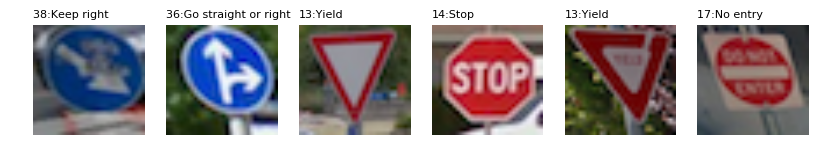

In [9]:
import matplotlib.image as mpimg
import cv2
import numpy as np

signs = ['g_keepright.png','g_straightorright.png','g_yield.png','stop.png','yield.png','noentry.png']

X_test = np.zeros([6,32,32,3])
y_test = [38,36,13,14,13,17]

plt.figure(figsize=(10,3))

for i in range(6):
    img=mpimg.imread(signs[i])
    img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    X_test[i] = img
    plt.subplot(1,6,i+1)
    plt.axis('off')
    plt.title(str(y_test[i]) + ":" + signDict[y_test[i]], loc='left', fontsize = 8)
    imgplot = plt.imshow(img)


    
#Evaluate 6 images, look at top 5 
k = 5
sm = tf.nn.softmax(logits)
top_k = tf.nn.top_k(sm, k)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    

    sm_prob = sess.run(sm, feed_dict={x:X_test, keep_prob: 1.0})
    top = sess.run(top_k, feed_dict={x:X_test, keep_prob: 1.0})
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))



### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Three signs are from California and three from Germany. The Californian signs like stop and yield might be recognized since they are similar to German signs. I expect the German signs to be recognized fully. Some of the German signs have stickers or other modifications that might make classification more difficult.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model predicted 5 out of 6 images correctly, so 83.3% accuracy. The no-entry sign from California is slightly different from the German version. Only the shape and color match - the white text in the sign might have affected the prediction. The distortion of the image also affected the classification.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [10]:
#print(top)

values, labels = top

for i in range(6):
    print("Actual - " + str(y_test[i]) + ": " + signDict[y_test[i]])
    for j in range(5):
        print("Prediction " + str(j) + "   " + str(values[i,j]*100) + "%  " + str(labels[i,j]) + ": " + signDict[labels[i,j]])
    print("\n")


Actual - 38: Keep right
Prediction 0   49.9386161566%  38: Keep right
Prediction 1   19.287841022%  33: Turn right ahead
Prediction 2   7.54519477487%  34: Turn left ahead
Prediction 3   3.70181202888%  40: Roundabout mandatory
Prediction 4   2.40698903799%  5: Speed limit (80km/h)


Actual - 36: Go straight or right
Prediction 0   96.809887886%  36: Go straight or right
Prediction 1   1.52252931148%  40: Roundabout mandatory
Prediction 2   0.663871876895%  33: Turn right ahead
Prediction 3   0.258374447003%  39: Keep left
Prediction 4   0.183649023529%  3: Speed limit (60km/h)


Actual - 13: Yield
Prediction 0   100.0%  13: Yield
Prediction 1   3.85781753764e-09%  3: Speed limit (60km/h)
Prediction 2   1.55120968154e-10%  35: Ahead only
Prediction 3   3.44665078813e-11%  22: Bumpy road
Prediction 4   1.54593650164e-11%  6: End of speed limit (80km/h)


Actual - 14: Stop
Prediction 0   99.990105629%  14: Stop
Prediction 1   0.00599484410486%  3: Speed limit (60km/h)
Prediction 2   0.00

For the correct predications, the first prediction was correct with most probabilites being 96% or greater. The "keep right" sign had a 49% chance of being the correct answer, but also a 19% chance of being "turn right ahead"

For the incorrectly predicted signs:
- For the no entry sign, the correct result was the 5th top prediction with a probability of 5.88%. So the probabilities were very uncertain in this case
